In [30]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Preprocessing:
1. Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2. Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3. Use multiple visualizations to understand the hidden patterns in the dataset

In [32]:
data = pd.read_excel(r"D:\DATA SCIENCE ASSIGNMENTS\Data Science Assignments\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [35]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [36]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


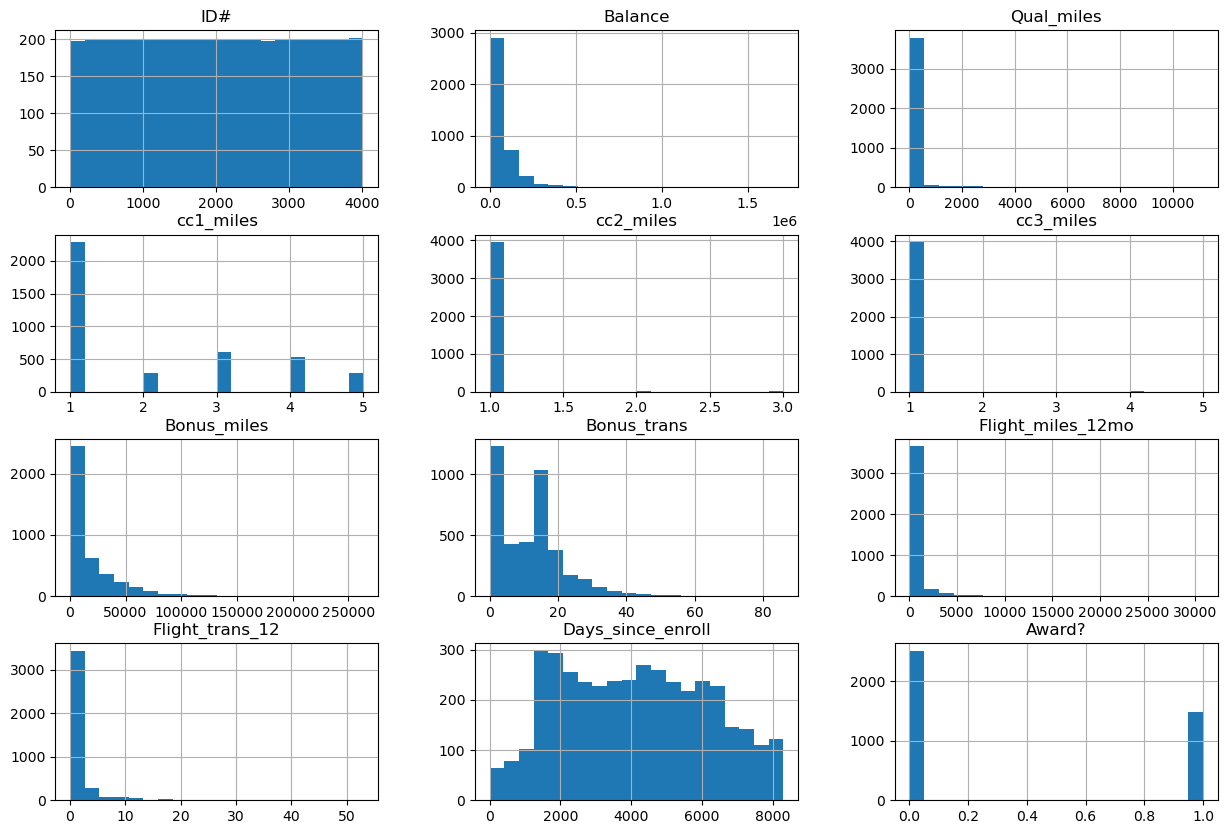

In [37]:
data.hist(bins=20,figsize=(15,10))
plt.show()

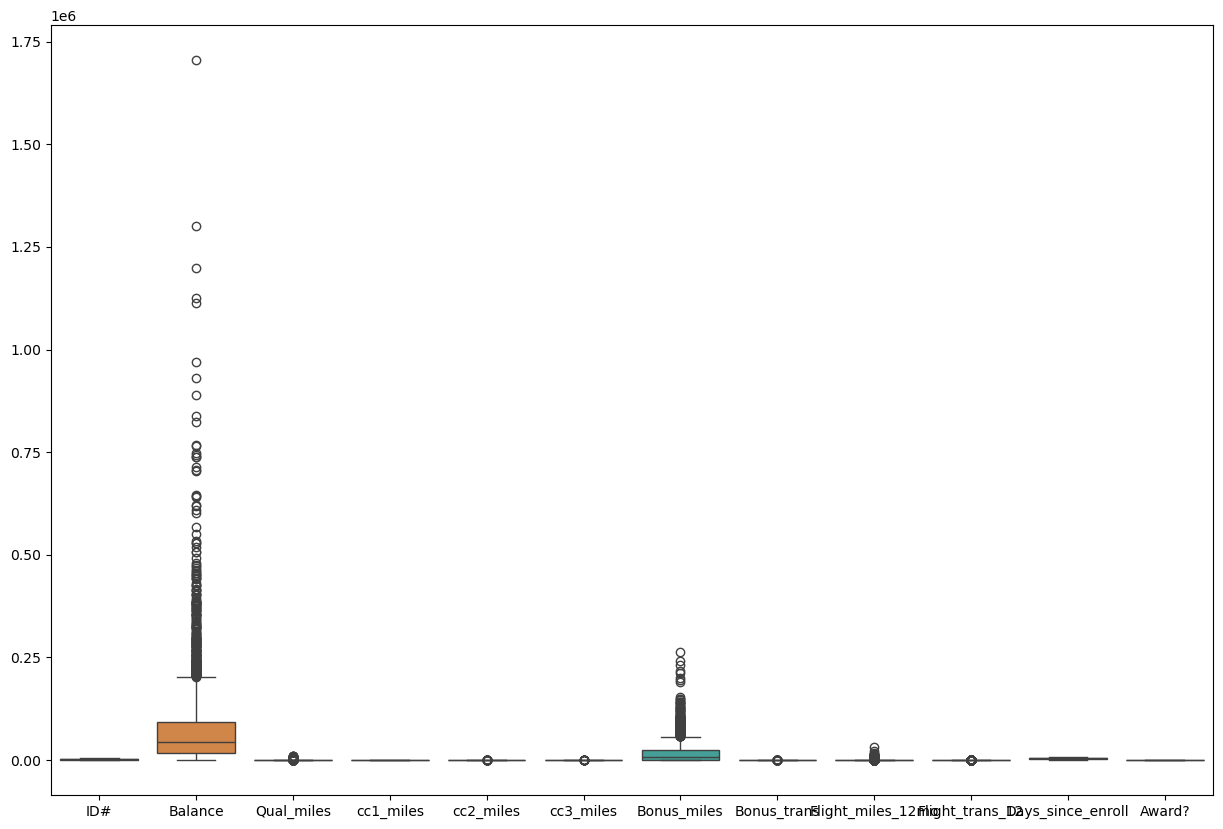

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.show()

<Axes: >

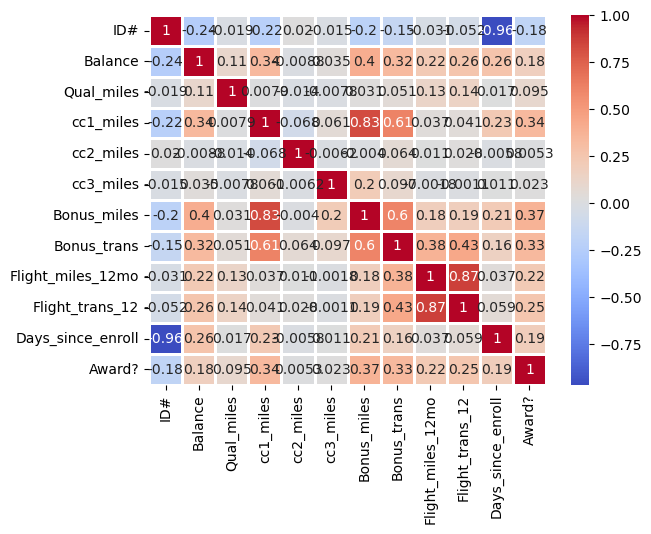

In [39]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidths=1)

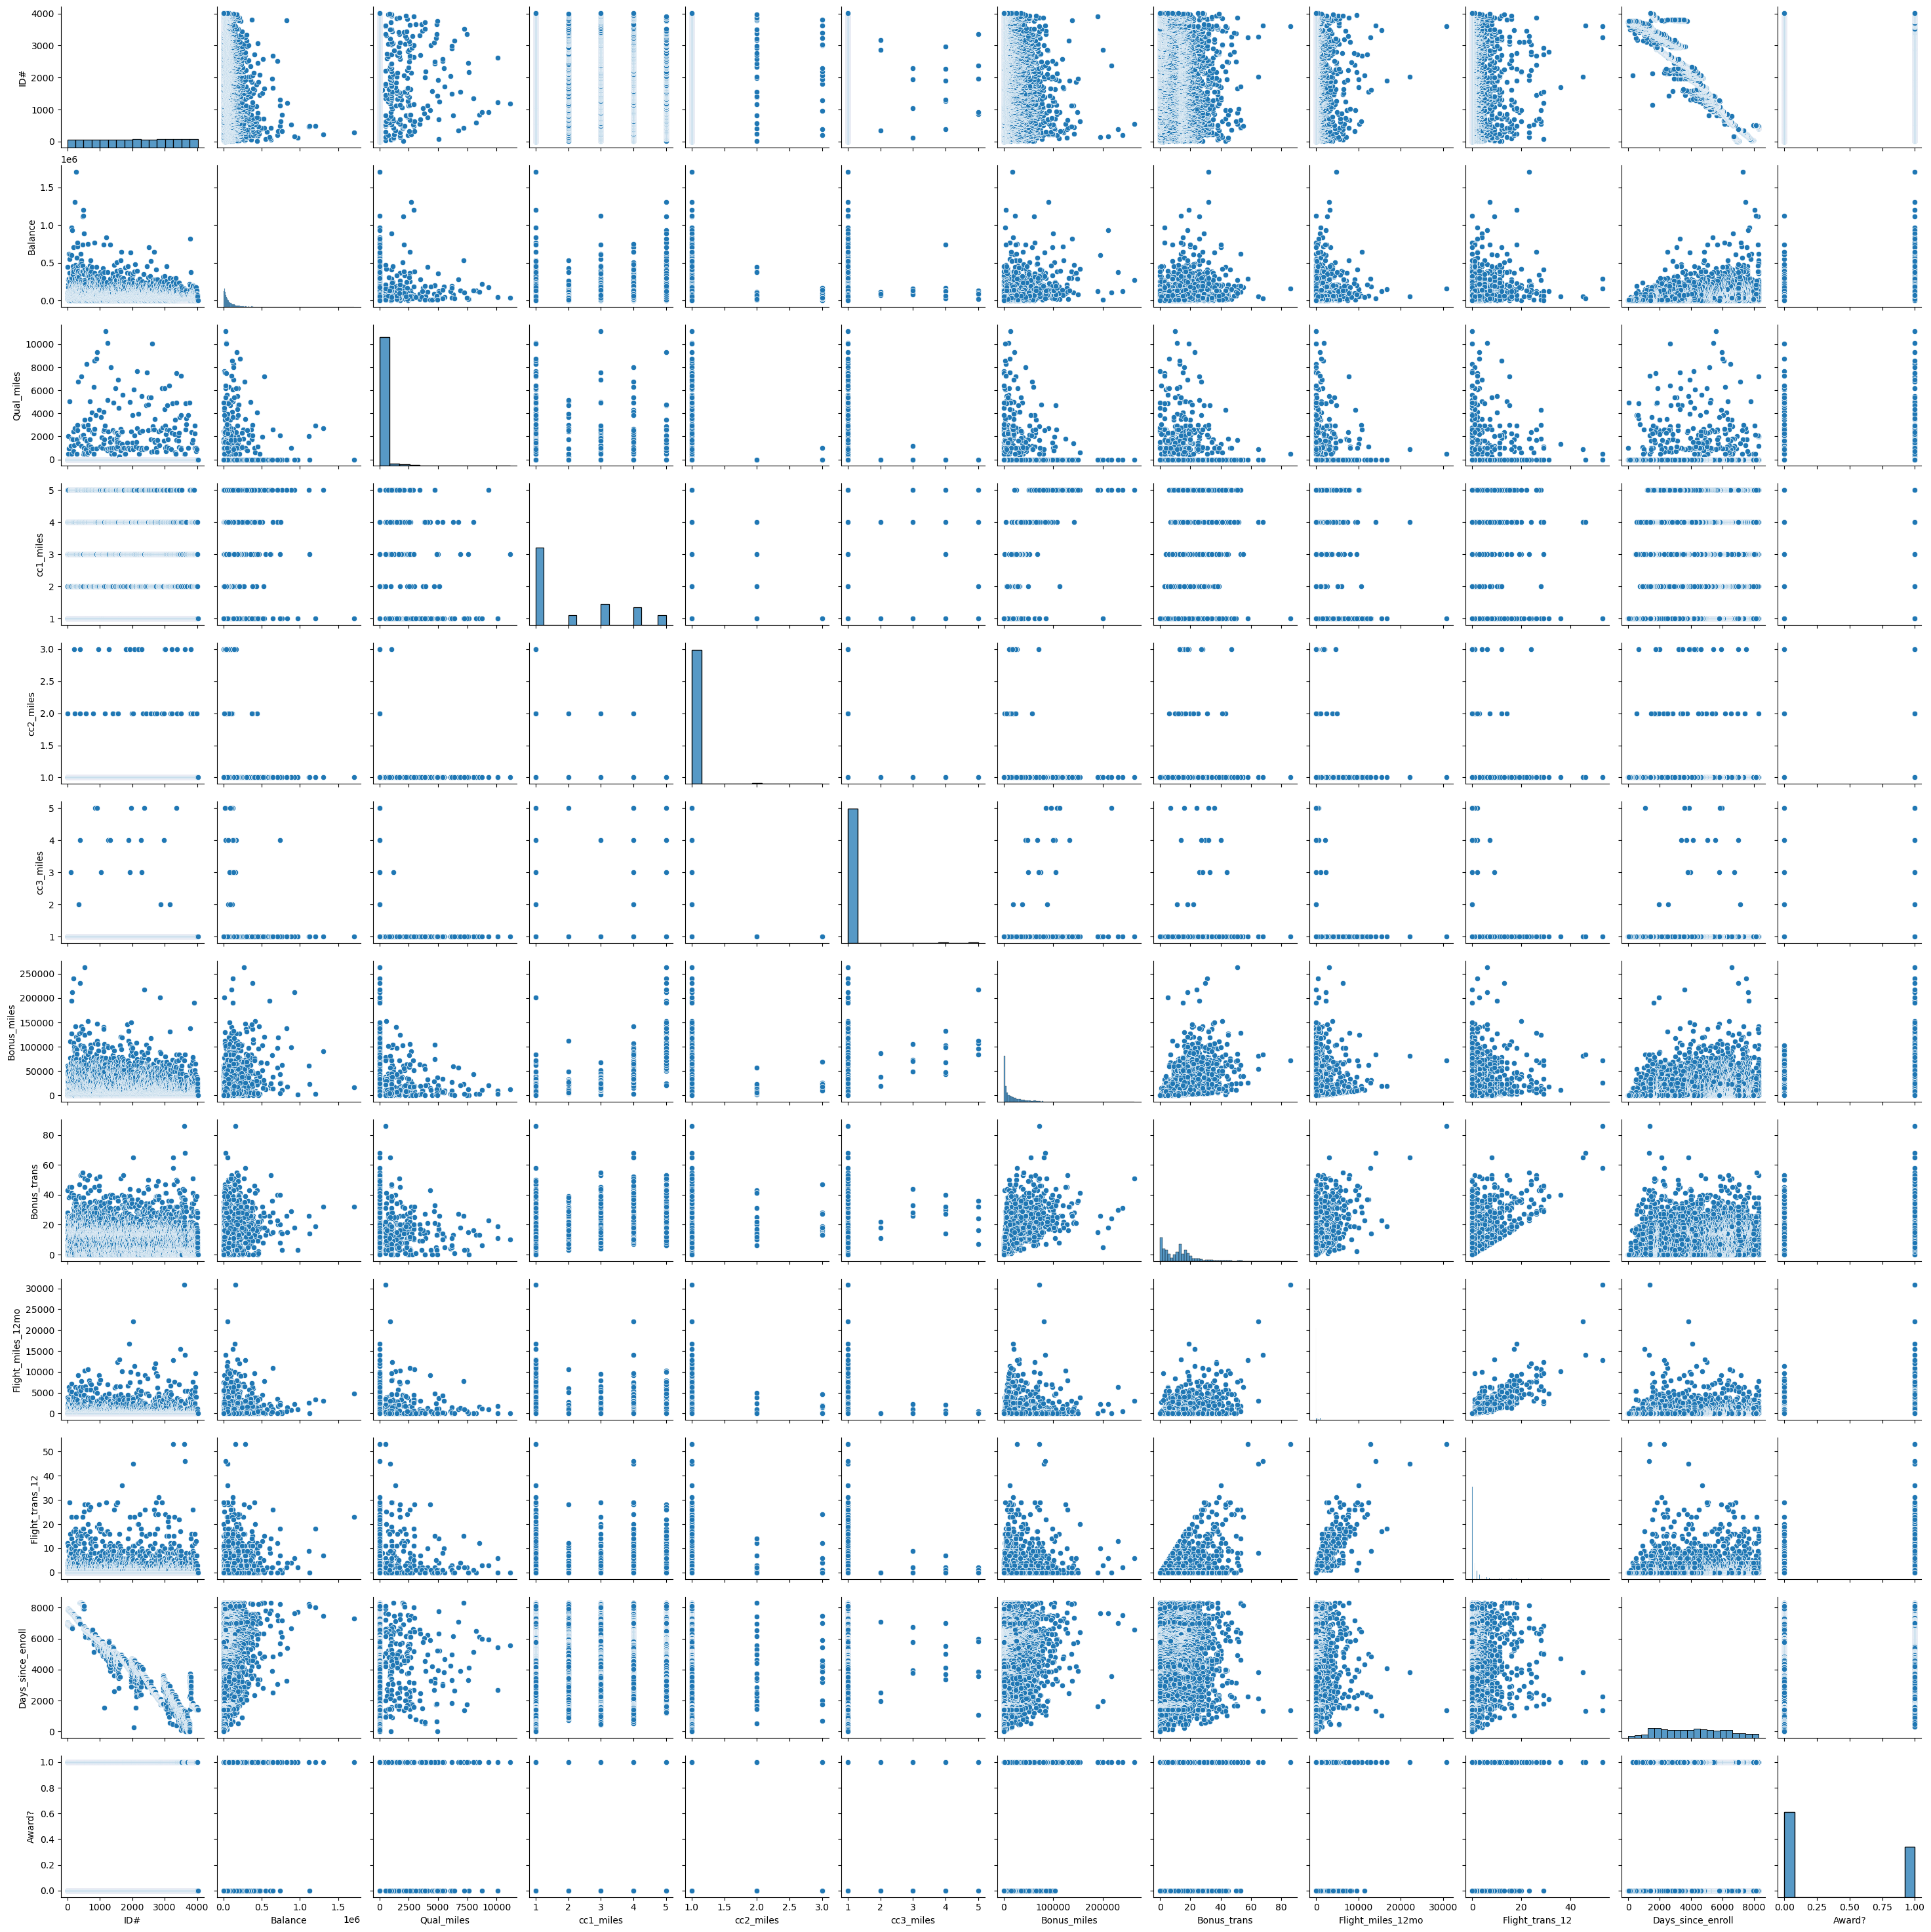

In [40]:
sns.pairplot(data)

# Implementing Clustering Algorithms:
1. Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

In [42]:
scaler = StandardScaler()

In [43]:
scaled_data = scaler.fit_transform(data)

In [44]:
#standardaization--feature scaling technique
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [45]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

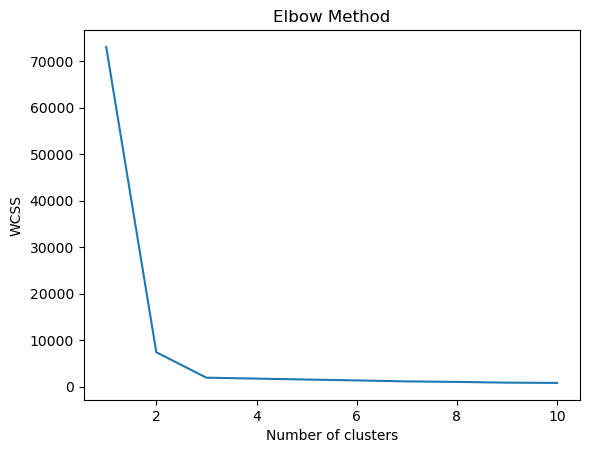

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [66]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')

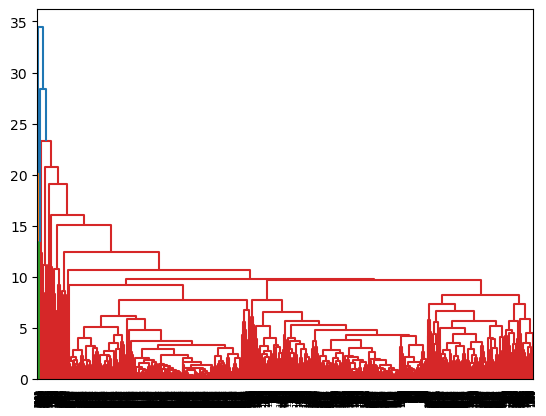

In [67]:
# Create Dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_data,method='complete'))

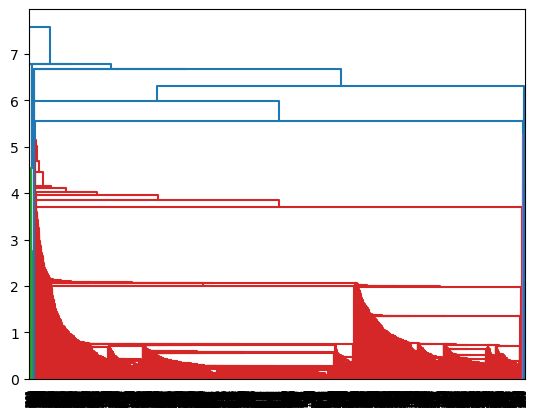

In [68]:
dendrogram1 = sch.dendrogram(sch.linkage(scaled_data,method='single'))

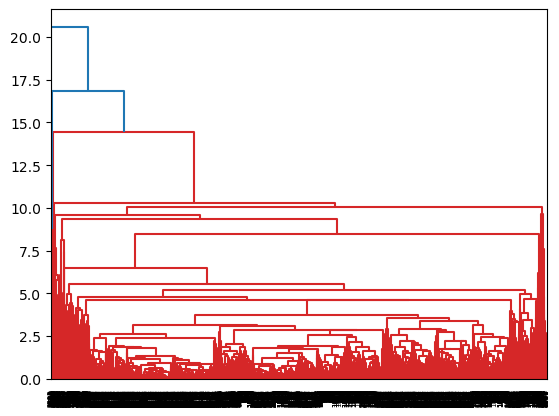

In [69]:
dendrogram1 = sch.dendrogram(sch.linkage(scaled_data,method='average'))

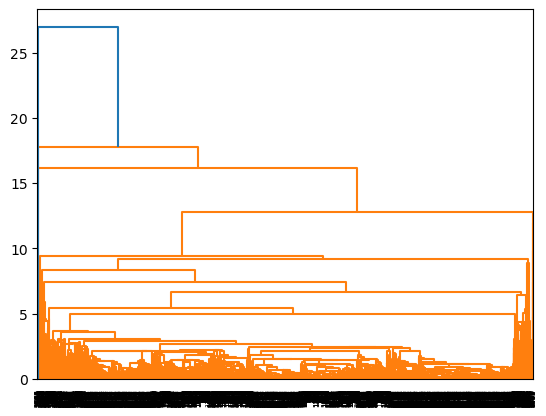

In [74]:
dendrogram1 = sch.dendrogram(sch.linkage(scaled_data,method='centroid'))

3. Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [84]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [85]:
y_hc = hc.fit_predict(scaled_data)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [86]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
labels

array([ 0,  1,  1,  1,  0,  1,  2,  1, -1,  2,  2, -1,  2,  2,  0,  0,  2,
        1, -1,  0,  1,  1,  2,  0,  2,  2,  0,  0,  2,  0, -1,  2,  0,  2,
        0,  1,  1,  2,  2,  0,  0,  0,  2,  0,  0,  2,  0,  2,  2,  0,  0,
        0,  2,  2,  1,  1,  2,  2,  1,  0,  2,  2,  0,  0,  1,  0,  1,  2,
        2,  1,  1,  1,  2,  2,  0,  2,  0,  2,  1,  0,  2,  0,  2,  1,  2,
        1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  2,  0,  2,  2,  0,  1,  0,
        2,  2,  0,  2,  0, -1,  2,  2,  2,  1, -1,  2,  1,  0,  1,  1,  2,
        1,  0,  2,  1,  1,  2,  2, -1,  0,  1,  2,  1,  0,  2,  2,  1,  2,
        1,  0,  2,  2,  1,  1, -1,  1, -1,  2,  1,  0,  0,  1,  1,  1,  0,
        2,  2,  0,  0,  2,  0,  0,  2,  1,  1,  2,  0,  1,  2,  2,  2,  2,
        2,  0,  1,  0,  0,  1,  0,  0,  2,  1,  2,  0,  0,  2,  0,  0,  2,
        2,  1, -1,  0,  1,  0,  0,  0,  2,  0,  0,  0,  2,  1,  0, -1,  1,
        1,  1,  2,  1,  0,  1,  1,  2,  2,  0,  2,  1,  2,  0,  1,  1,  2,
        0,  1,  1,  2,  2

# Cluster Analysis and Interpretation:
Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.
# K-Means Clustering Analysis
1. Cluster Centers: After K-Means clustering, the cluster centers represent the mean position of all points in a cluster. You can examine these centers to interpret the characteristics of each cluster.
2. Cluster Size: Look at the number of data points in each cluster to understand its density or popularity.
3. Feature Distribution: Analyze the distribution of features within each cluster (e.g., average income, age, etc.).
# comments:
1. Primarily contains young individuals with low income, indicating a cluster of early-stage professionals
2. Individuals in this cluster have high income and are mostly middle-aged, suggesting established professionals.

# Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

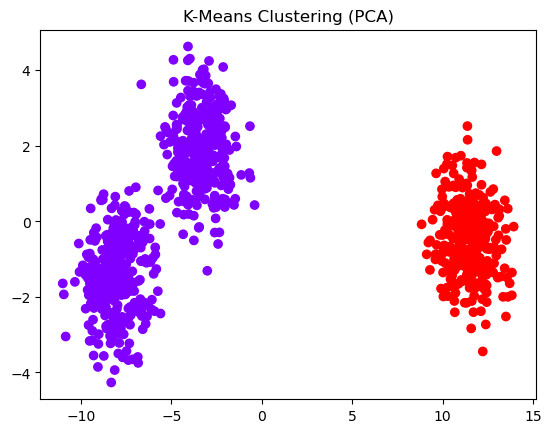

In [89]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit K-Means on the original (higher-dimensional) data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Scatter plot on the 2D PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('K-Means Clustering (PCA)')
plt.show()

# Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [91]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X, kmeans.labels_)
silhouette_dbscan = silhouette_score(X, dbscan.labels_)
print(silhouette_kmeans)
print(silhouette_dbscan)

0.8168010615320442
0.7173496511151657
